In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rice-disease-dataset/Rice_Leaf_AUG/Leaf scald/aug_0_5995.jpg
/kaggle/input/rice-disease-dataset/Rice_Leaf_AUG/Leaf scald/Leaf_scald (86).jpg
/kaggle/input/rice-disease-dataset/Rice_Leaf_AUG/Leaf scald/aug_0_5914.jpg
/kaggle/input/rice-disease-dataset/Rice_Leaf_AUG/Leaf scald/aug_0_2467.jpg
/kaggle/input/rice-disease-dataset/Rice_Leaf_AUG/Leaf scald/aug_0_2138.jpg
/kaggle/input/rice-disease-dataset/Rice_Leaf_AUG/Leaf scald/aug_0_914.jpg
/kaggle/input/rice-disease-dataset/Rice_Leaf_AUG/Leaf scald/aug_0_3199.jpg
/kaggle/input/rice-disease-dataset/Rice_Leaf_AUG/Leaf scald/aug_0_2738.jpg
/kaggle/input/rice-disease-dataset/Rice_Leaf_AUG/Leaf scald/aug_0_143.jpg
/kaggle/input/rice-disease-dataset/Rice_Leaf_AUG/Leaf scald/aug_0_1933.jpg
/kaggle/input/rice-disease-dataset/Rice_Leaf_AUG/Leaf scald/aug_0_3645.jpg
/kaggle/input/rice-disease-dataset/Rice_Leaf_AUG/Leaf scald/aug_0_890.jpg
/kaggle/input/rice-disease-dataset/Rice_Leaf_AUG/Leaf scald/Leaf_scald (29).jpg
/kaggle/input/rice

# Here we have imported necessary libraries and loaded our dataset from kaggle.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import os
import warnings
warnings.simplefilter('ignore')

In [3]:
BATCH_SIZE = 20
IMAGE_SIZE = 128
CHANNELS=3
EPOCHS=50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/rice-disease-dataset/Rice_Leaf_AUG",
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 3829 files belonging to 6 classes.


**Data Partitions¶**

This Python function, get_dataset_partitions_tf, partitions a given dataset (ds) into training, validation, and test sets using TensorFlow's tf.data.Dataset API. It takes arguments for the splits (train_split, val_split, test_split), shuffling options (shuffle, shuffle_size), and asserts that the splits sum to 1. It shuffles the dataset if specified, then calculates and returns the three dataset partitions.

In [5]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds


In [6]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

Checking our classes

['Bacterial Leaf Blight',
 'Brown Spot',
 'Healthy Rice Leaf',
 'Leaf Blast',
 'Leaf scald',
 'Sheath Blight']

# Visualizing our dataset

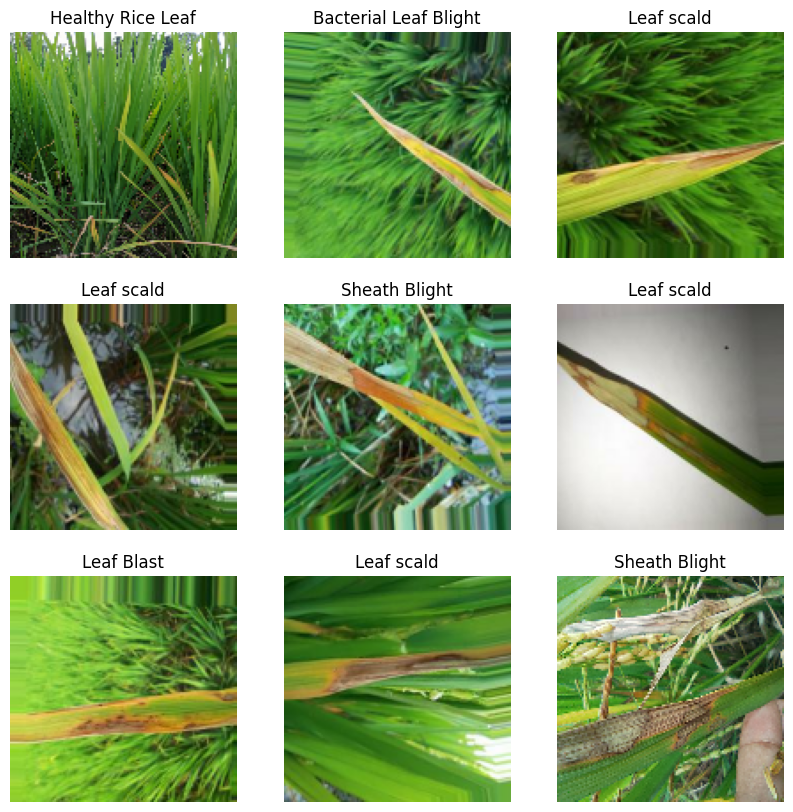

In [8]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

CNN with Tuned Hyperparameters¶
This code defines a convolutional neural network (CNN) model using TensorFlow's Keras API and trains it on a dataset. Here's a breakdown of the code:

1. Model Definition:
The tf.keras.Sequential function is used to create a sequential model, which is a linear stack of layers.
The model begins with a Rescaling layer to scale input pixel values to the range [0, 1].
It then has three convolutional layers each of these layers are set according to the parameters obtained from PSO-CNN (Conv2D) with ReLU activation functions, followed by max pooling (MaxPooling2D) layers to downsample the feature maps.
After the convolutional layers, there's a Flatten layer to flatten the 3D output to 1D.
The flattened output is passed through two dense (Dense) layers, the last one having 6 units for the classification of 6 classes.
2. Model Compilation:
The model.compile method is used to configure the model for training.
The Adam optimizer is used with the sparse categorical crossentropy loss function and accuracy as the metric.
3. Model Training:
The model.fit method is used to train the model.
It takes the training dataset (train_ds) and validation dataset (val_ds) as inputs, along with other parameters like verbosity (verbose), number of epochs (epochs), etc.
The fit method trains the model for 20 epochs, optimizing the specified loss function using the specified optimizer.
Overall, this code defines a CNN model, compiles it, and trains it on a dataset for 20 epochs, using the Adam optimizer.



In [9]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(65, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(35, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(64, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(6)
    ]
)

In [11]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/20


I0000 00:00:1726541437.877043      92 service.cc:145] XLA service 0x7d1b6402e880 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726541437.877094      92 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726541437.877100      92 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 11/153 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1866 - loss: 1.8583

I0000 00:00:1726541445.209935      92 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


153/153 ━━━━━━━━━━━━━━━━━━━━ 29s 84ms/step - accuracy: 0.2707 - loss: 1.6808 - val_accuracy: 0.5579 - val_loss: 1.1800
Epoch 2/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - accuracy: 0.5652 - loss: 1.1309 - val_accuracy: 0.5895 - val_loss: 1.0804
Epoch 3/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.6665 - loss: 0.8919 - val_accuracy: 0.7132 - val_loss: 0.7431
Epoch 4/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - accuracy: 0.7266 - loss: 0.7383 - val_accuracy: 0.7737 - val_loss: 0.5919
Epoch 5/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.7986 - loss: 0.5552 - val_accuracy: 0.8737 - val_loss: 0.4098
Epoch 6/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 17s 61ms/step - accuracy: 0.8554 - loss: 0.4301 - val_accuracy: 0.9316 - val_loss: 0.2896
Epoch 7/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.8900 - loss: 0.3212 - val_accuracy: 0.9553 - val_loss: 0.1706
Epoch 8/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - accuracy: 0.9238 - loss: 0.2413 - val_accurac

In [12]:
scores = model.evaluate(test_ds)

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9892 - loss: 0.0266 


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 65)   │         1,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 65)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 35)     │        20,510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 35)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        20,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,947,266 (18.87 MB)

 Trainable params: 1,649,088 (6.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,298,178 (12.58 MB)

# > Visualizing our Model Summary

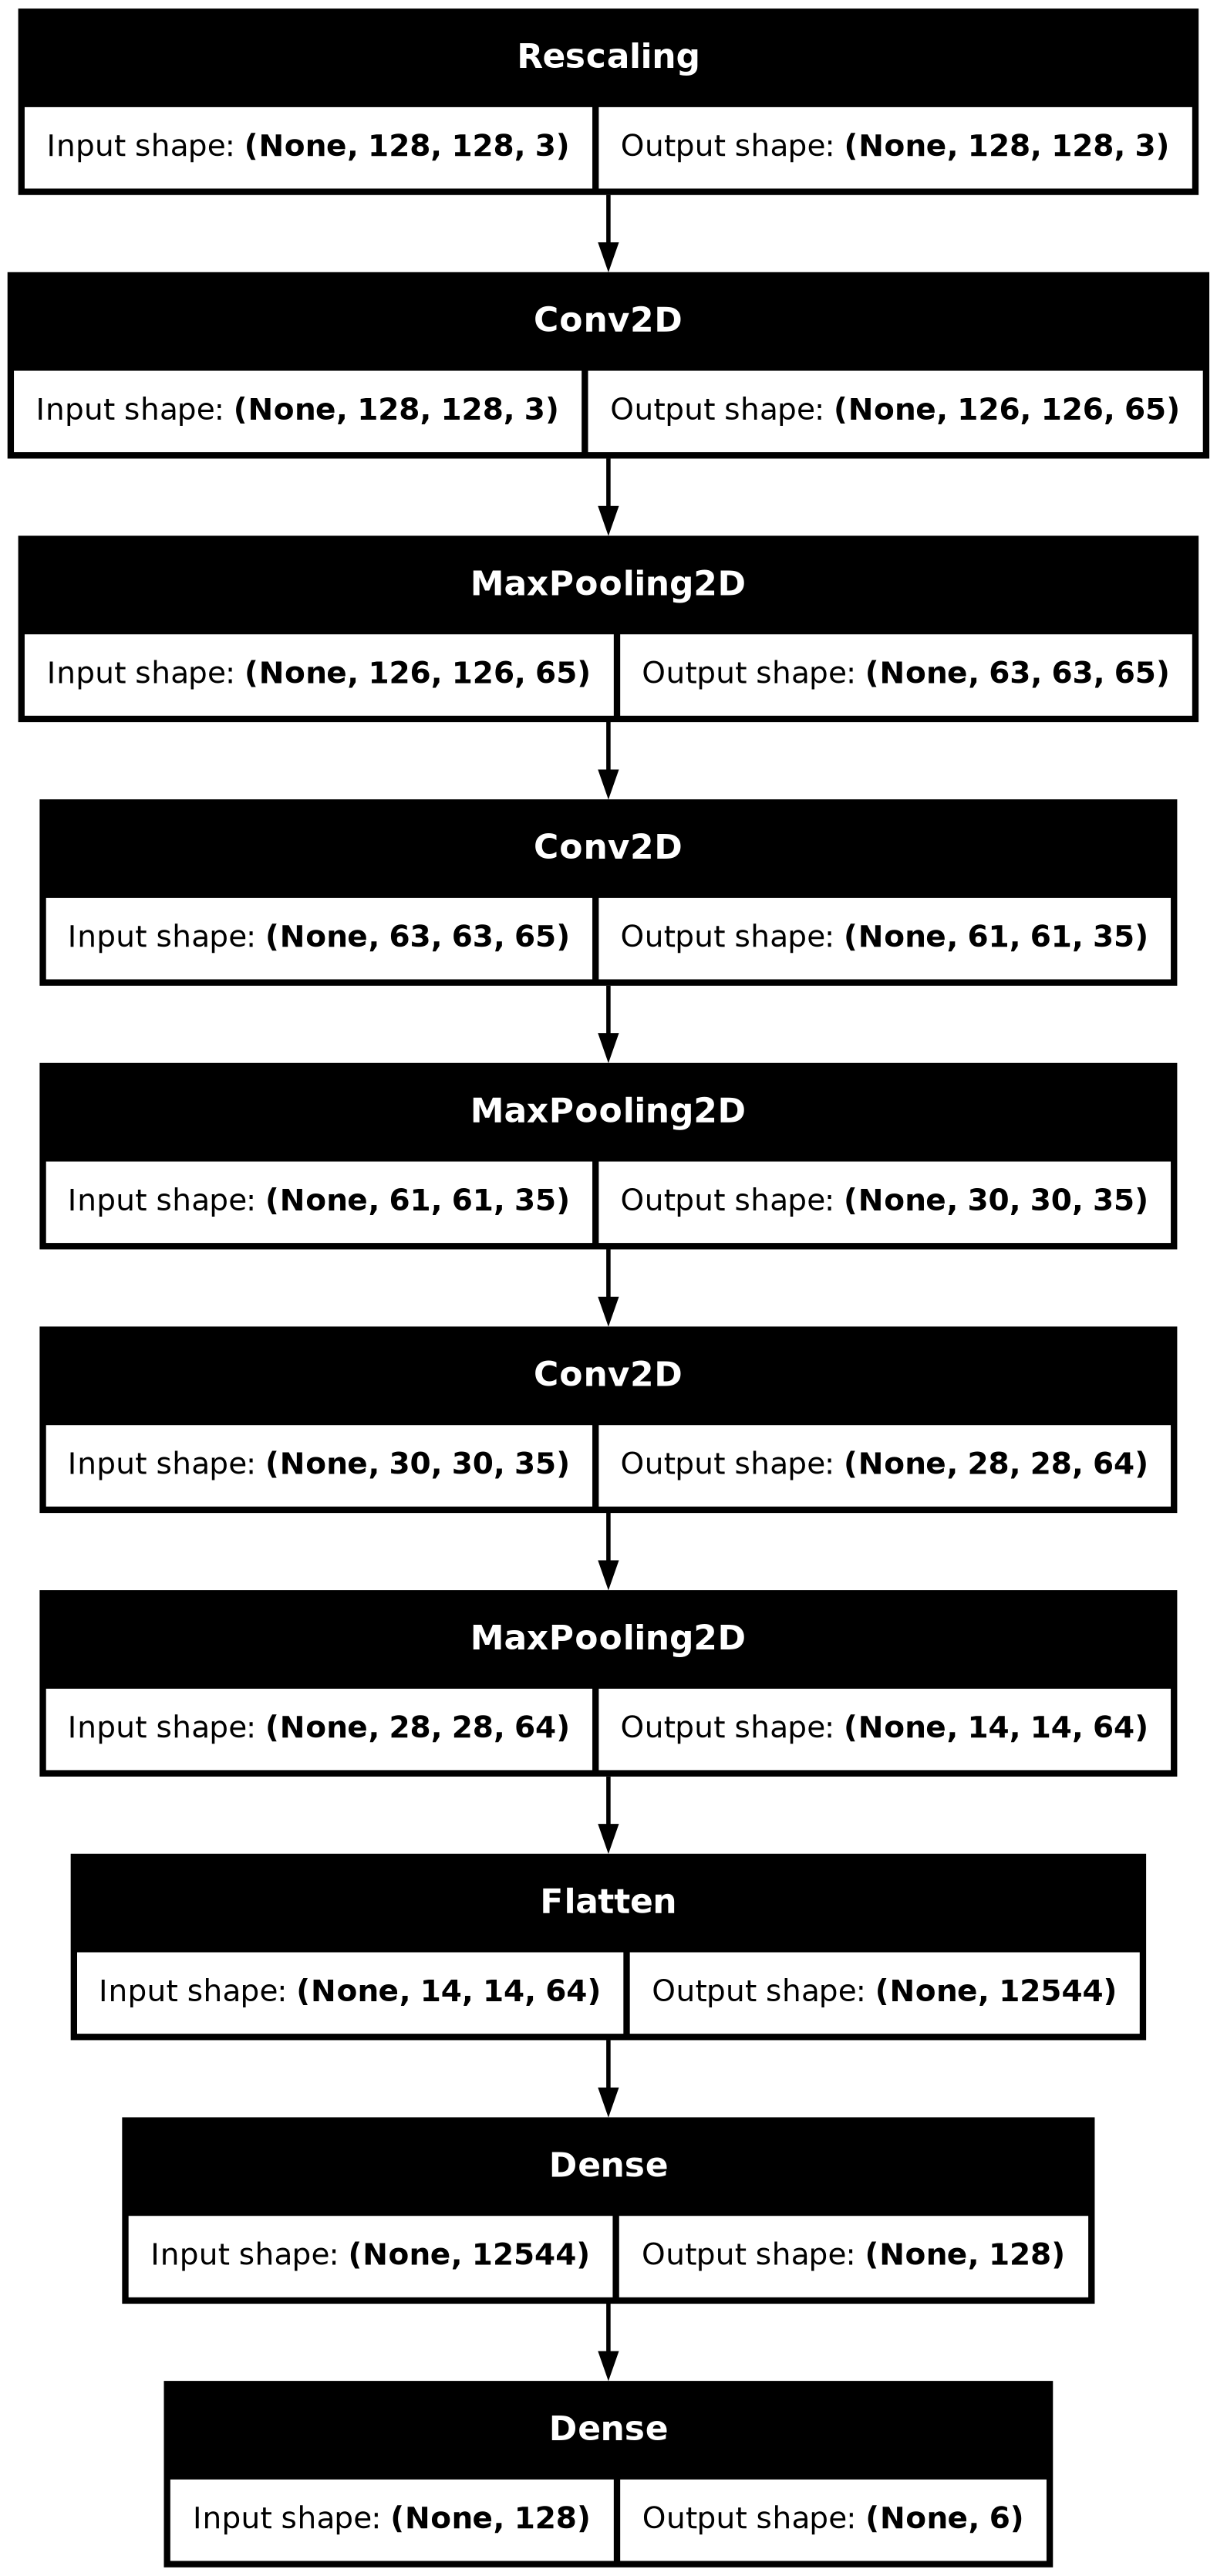

In [14]:
tf.keras.utils.plot_model(model, show_shapes=True)

This code is used to visualize the training and validation performance of a machine learning model, specifically a convolutional neural network (CNN) trained using TensorFlow's Keras API. Here's a breakdown of the code:

1. history:
history is an object returned by the model.fit method when training the model. It contains information about the training process, such as loss and accuracy values for each epoch.
2. history.params:
history.params is a dictionary containing the parameters used for training the model, such as batch size, number of epochs, etc.
3. history.history.keys():
history.history.keys() returns the keys of the history.history dictionary, which include 'accuracy', 'val_accuracy', 'loss', and 'val_loss'.
4. Data Extraction:
acc, val_acc, loss, and val_loss are extracted from history.history and represent the training and validation accuracy and loss values for each epoch, respectively.
5. Visualization:
Matplotlib is used to create a figure with two subplots.
The first subplot (plt.subplot(1, 2, 1)) plots the training and validation accuracy (acc and val_acc) over the epochs.
The second subplot (plt.subplot(1, 2, 2)) plots the training and validation loss (loss and val_loss) over the epochs.
Both subplots have labels, legends, and titles to indicate what they represent.
Finally, plt.show() is called to display the plots.
Overall, this code is a common practice in machine learning to visualize the training and validation performance of a model, which helps in understanding how well the model is learning the data and if there is any overfitting or underfitting.



In [15]:
history

In [16]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 153}

In [17]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

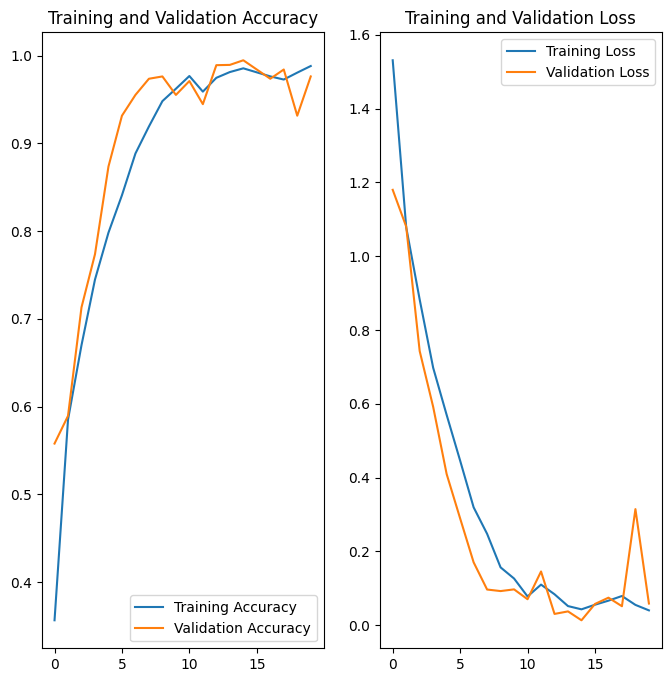

In [19]:
EPOCHS=20
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


 #  predicting our Results

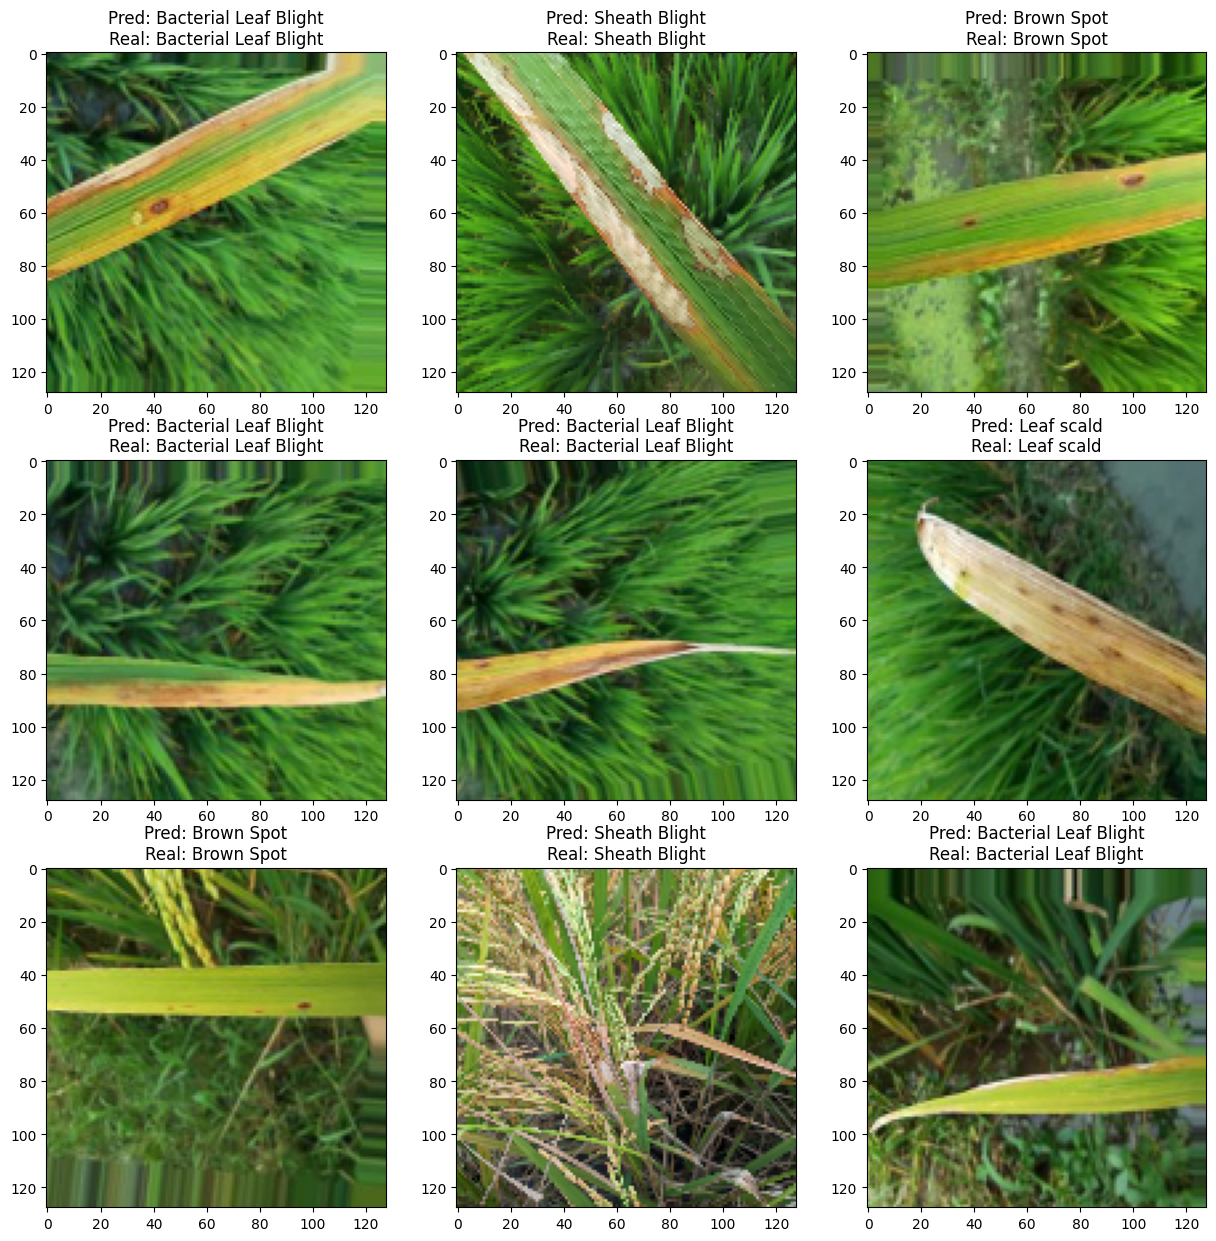

In [20]:
import numpy

plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    classifications = model(images)
  #print(classifications)

    for i in range(9):
               
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        index = numpy.argmax(classifications[i])
        #print(index)
        plt.title("Pred: " + class_names[index] + "\nReal: " + class_names[labels[i]])

# Confusion matrix

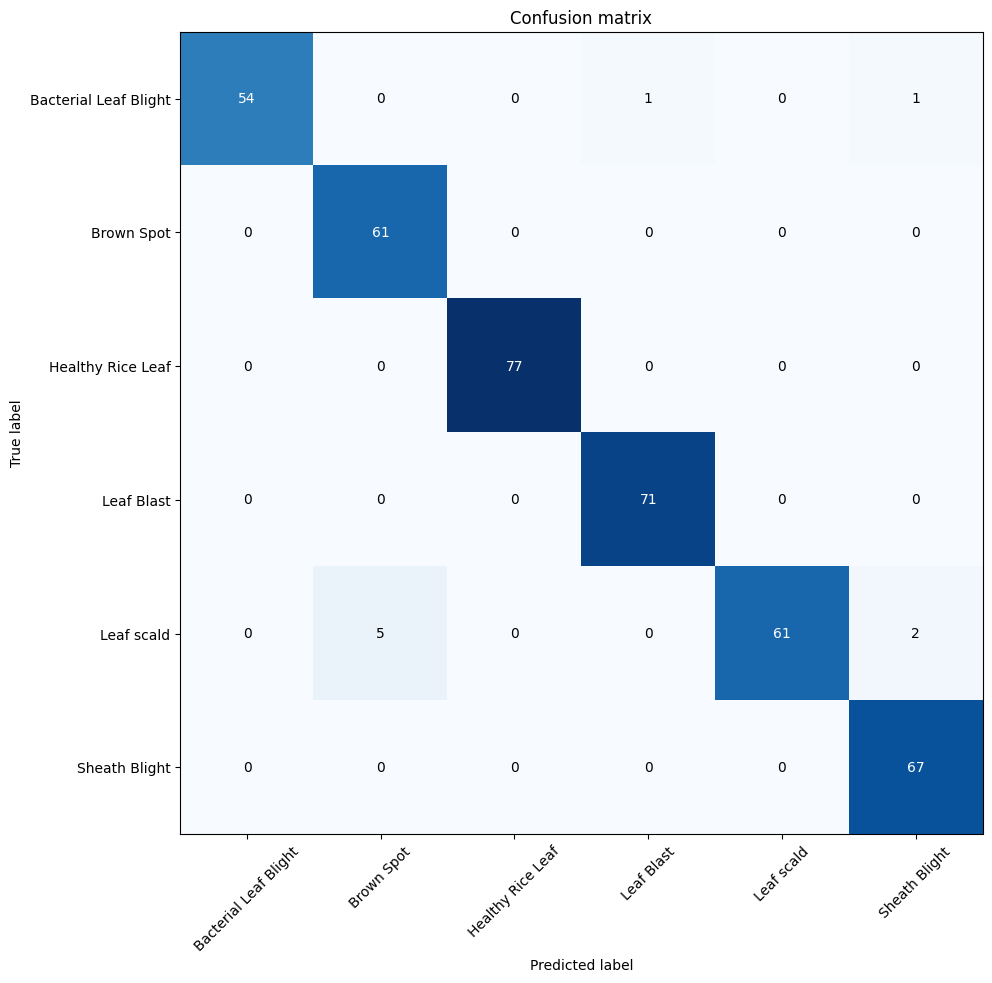

In [22]:
all_predicted_labels = []
all_actual_labels = []

for images, labels in test_ds:
    classifications = model(images)
    predicted_labels = [np.argmax(classification) for classification in classifications.numpy()]
    all_predicted_labels.extend(predicted_labels)
    all_actual_labels.extend(labels.numpy())

# Create confusion matrix
conf_matrix = confusion_matrix(all_actual_labels, all_predicted_labels)

# Plot confusion matrix with numbers
plt.figure(figsize=(10, 10))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
#plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')


thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# Classification Report

In [23]:
from sklearn.metrics import classification_report

report = classification_report(all_actual_labels, all_predicted_labels, target_names=class_names)


print(report)

                       precision    recall  f1-score   support

Bacterial Leaf Blight       1.00      0.96      0.98        56
           Brown Spot       0.92      1.00      0.96        61
    Healthy Rice Leaf       1.00      1.00      1.00        77
           Leaf Blast       0.99      1.00      0.99        71
           Leaf scald       1.00      0.90      0.95        68
        Sheath Blight       0.96      1.00      0.98        67

             accuracy                           0.98       400
            macro avg       0.98      0.98      0.98       400
         weighted avg       0.98      0.98      0.98       400

